In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings as warnings
warnings.filterwarnings("ignore")

from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [2]:
from google.colab import files
uploaded  = files.upload()

Saving crime_data.csv to crime_data.csv


In [3]:
Crime_Data = pd.read_csv('crime_data.csv')
Crime_Data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
# Shape of Data

Crime_Data.shape

(50, 5)

In [5]:
Crime_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
Crime_Data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
# Renaming the Unnamed: 0	Column into States

Crime_Data = Crime_Data.rename(columns = {'Unnamed: 0' : 'States'})
Crime_Data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
# Checking null Values

Crime_Data.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [9]:
# Check for Duplicate Values

Crime_Data[Crime_Data.duplicated()].shape

(0, 5)

In [10]:
Crime_Data[Crime_Data.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


In [11]:
# So, as above result shows there is no duplicate record as well as missing values present in the dataset

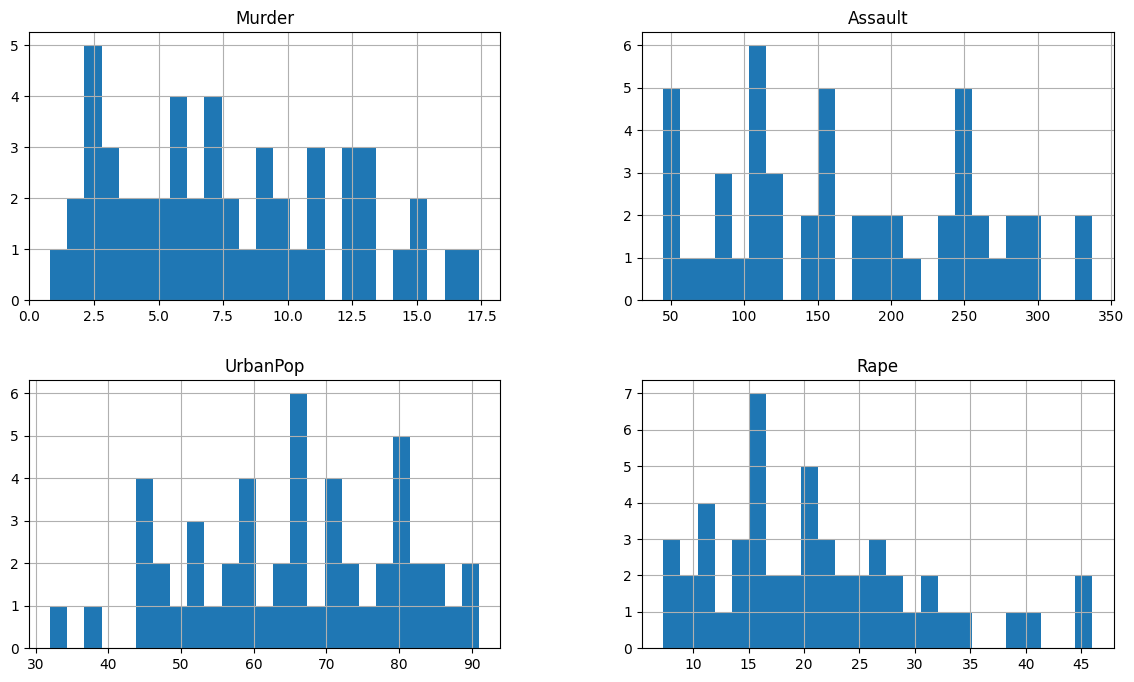

In [12]:
# Histogram

Crime_Data.hist(figsize=(14,8), bins=25)
plt.show()

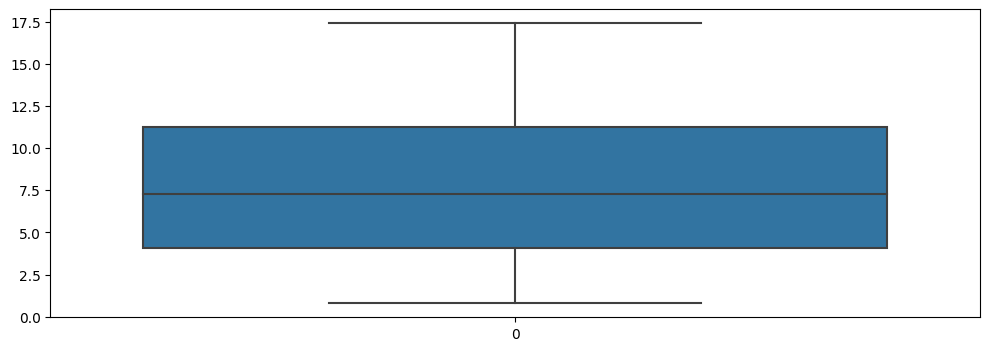

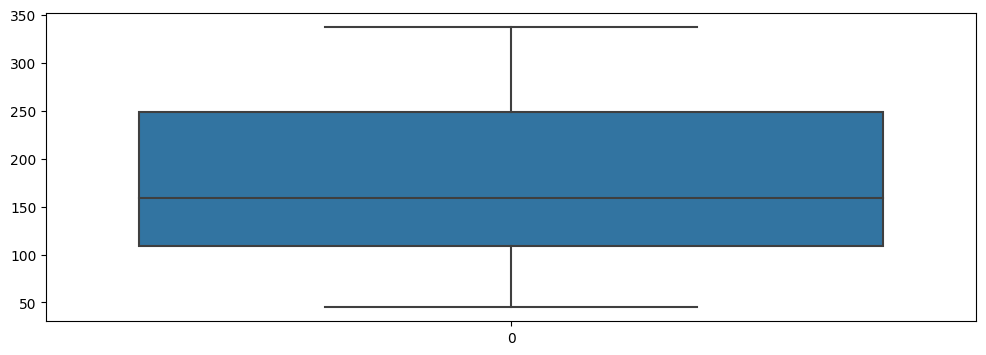

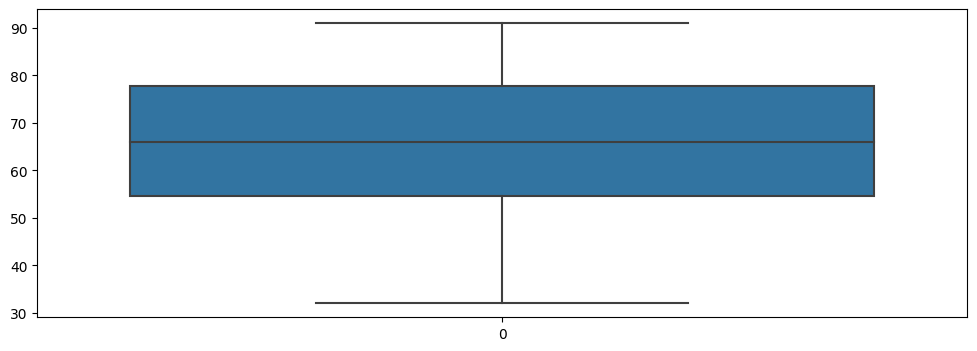

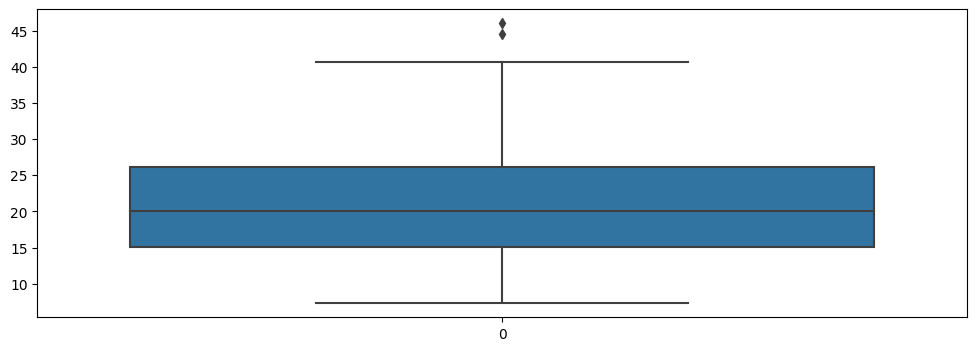

In [15]:
# Barplot

for feature in Crime_Data.columns[1:]:
    plt.figure(figsize=(12,4))
    sns.boxplot(Crime_Data[feature])

<Axes: >

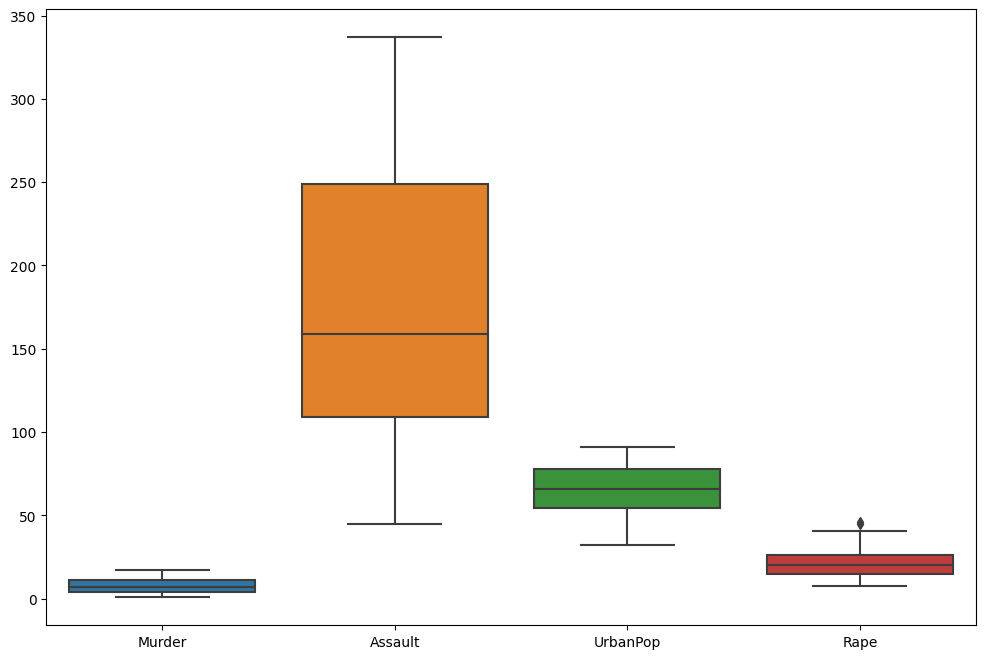

In [16]:
# Compare features

plt.figure(figsize=(12,8))
sns.boxplot(data=Crime_Data)

In [17]:
# As we can see that the Assault crime rate is high.

In [18]:
# Correlation

Crime_Data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


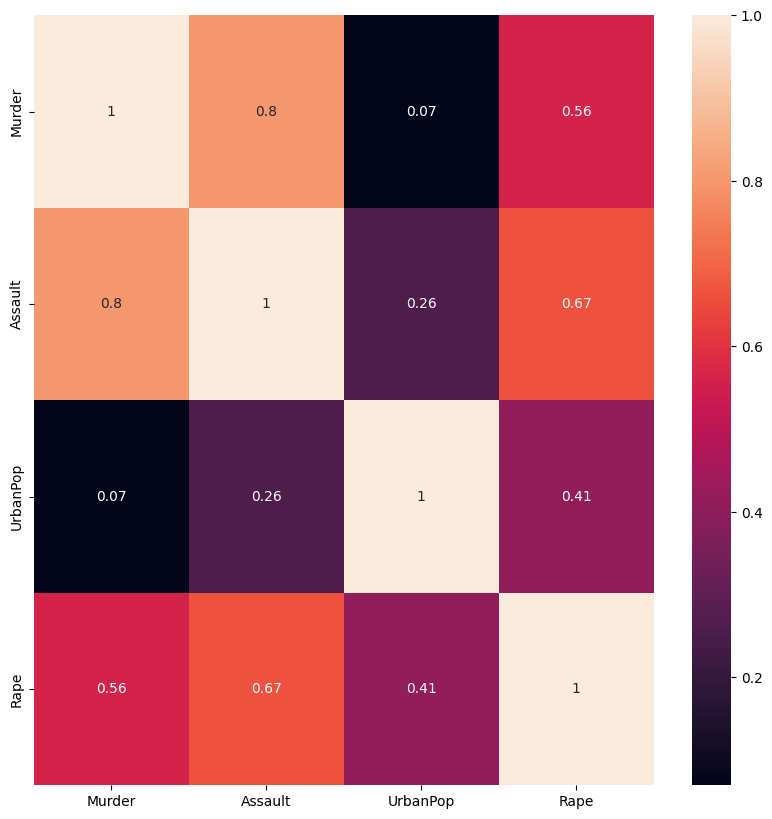

In [20]:
plt.figure(figsize = (10,10))
sns.heatmap(Crime_Data.corr(), annot = True)
plt.show()

In [21]:
# Murder Rate and and Rape Rate are strongly Correlated to Assault Rate

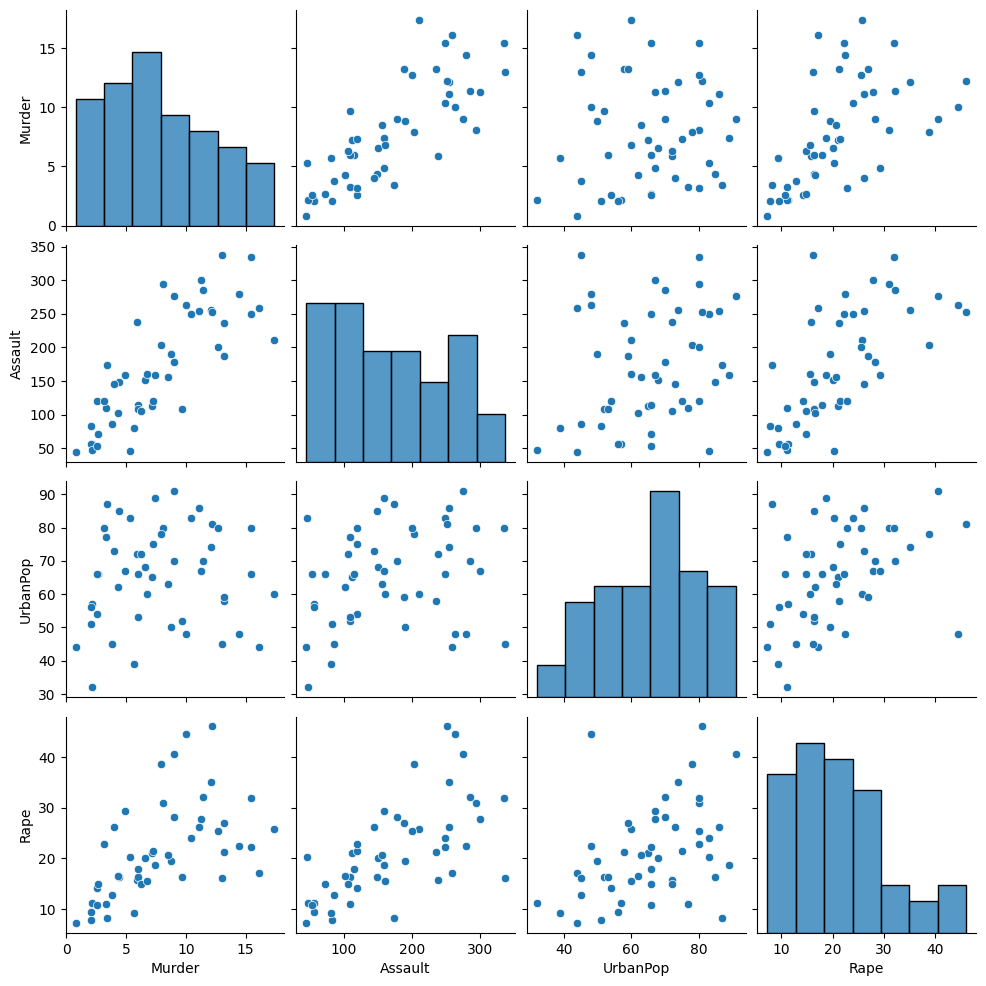

In [22]:
# PairPlot

sns.pairplot(data = Crime_Data)

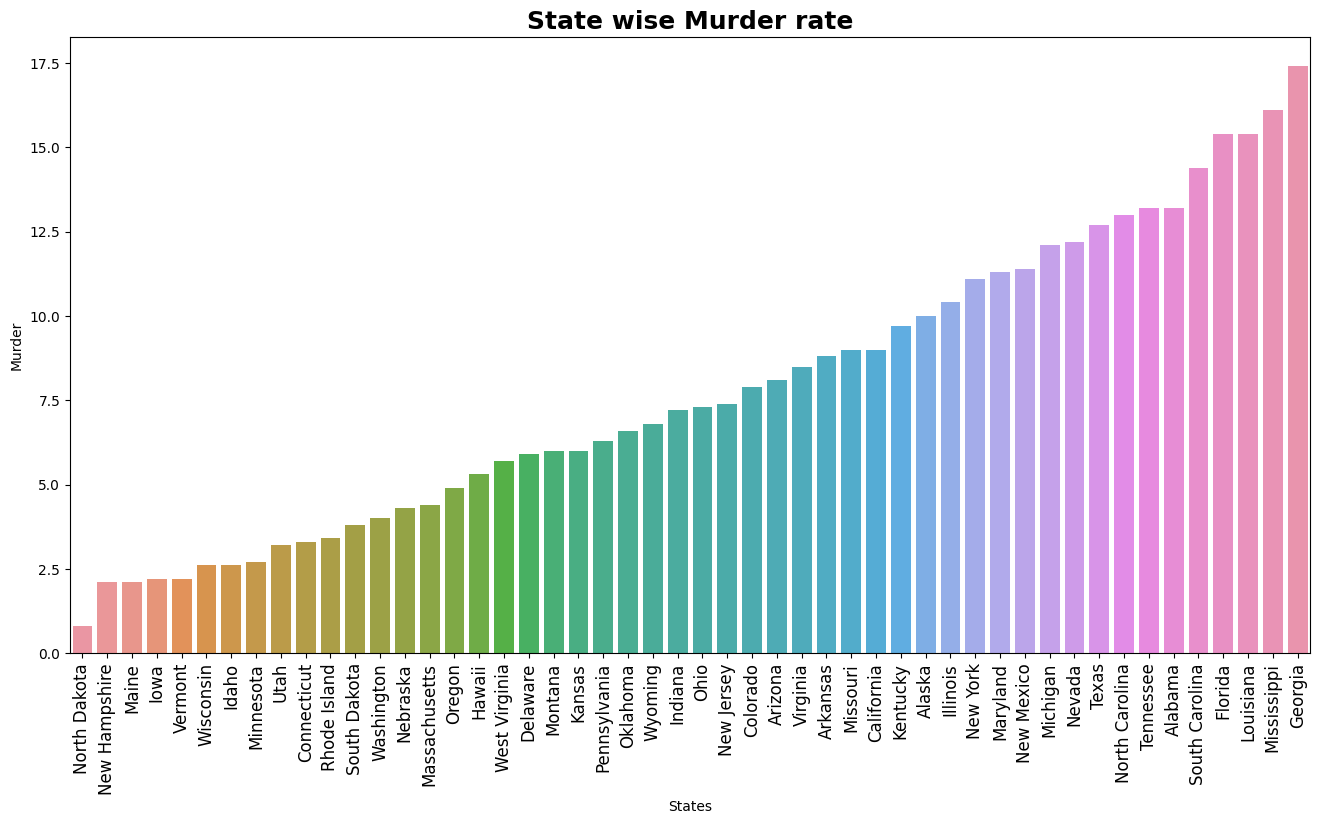

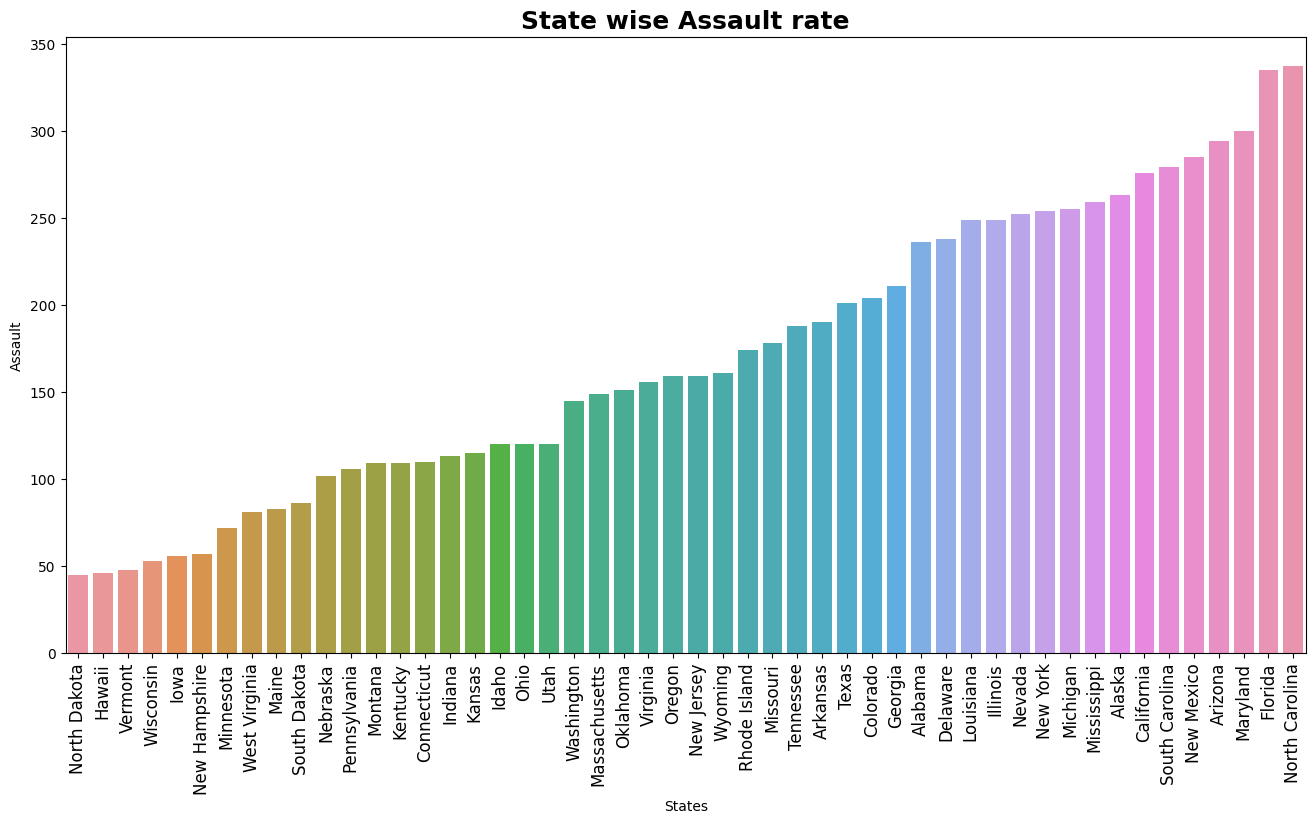

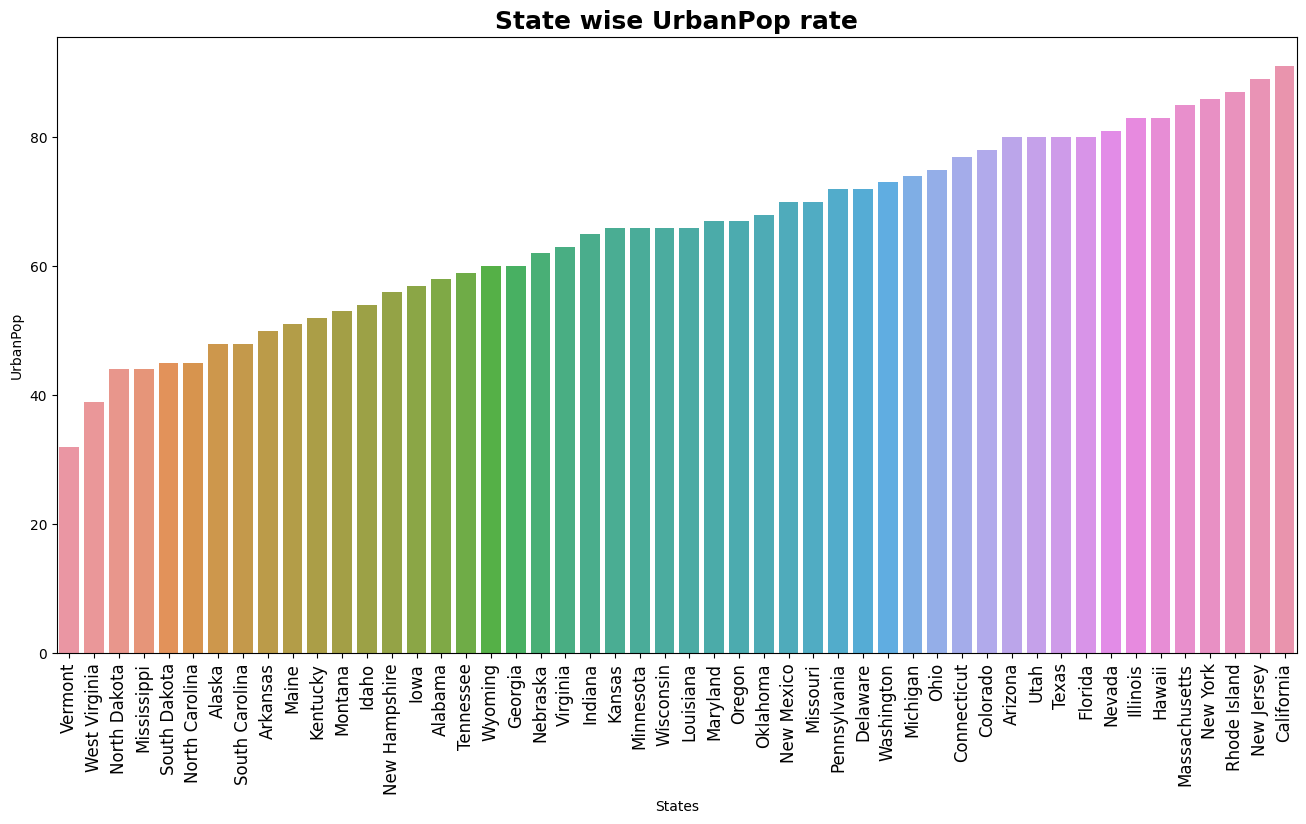

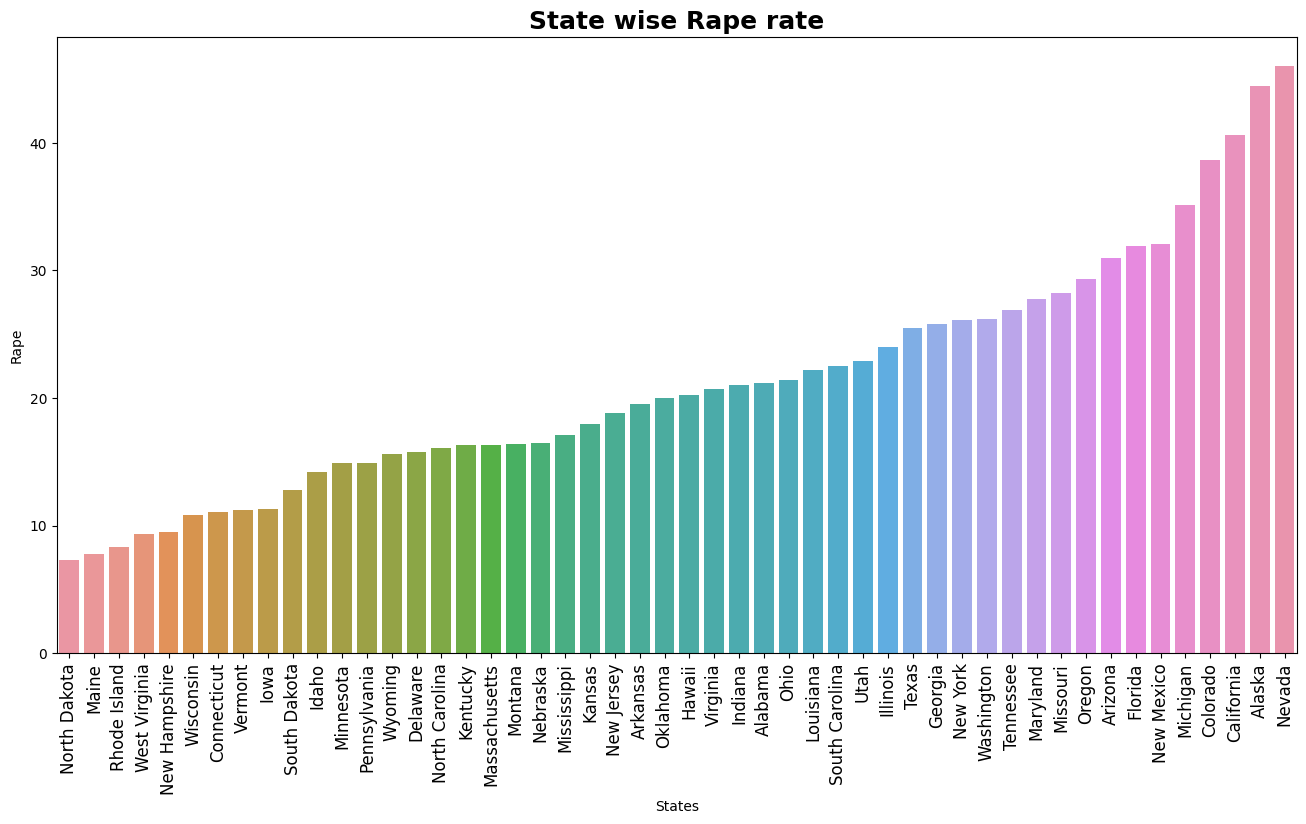

In [25]:
# Visualizing Features State Wise

for i in Crime_Data.columns[1:]:
    plt.figure(figsize=(16,8))
    sns.barplot(x=Crime_Data["States"],y=i, data=Crime_Data,
              order=Crime_Data.sort_values(i).States)
    plt.xticks(rotation = 90,fontsize = 12)
    plt.title("State wise "+str(i)+" rate", fontsize=18, fontweight='bold')
plt.show()

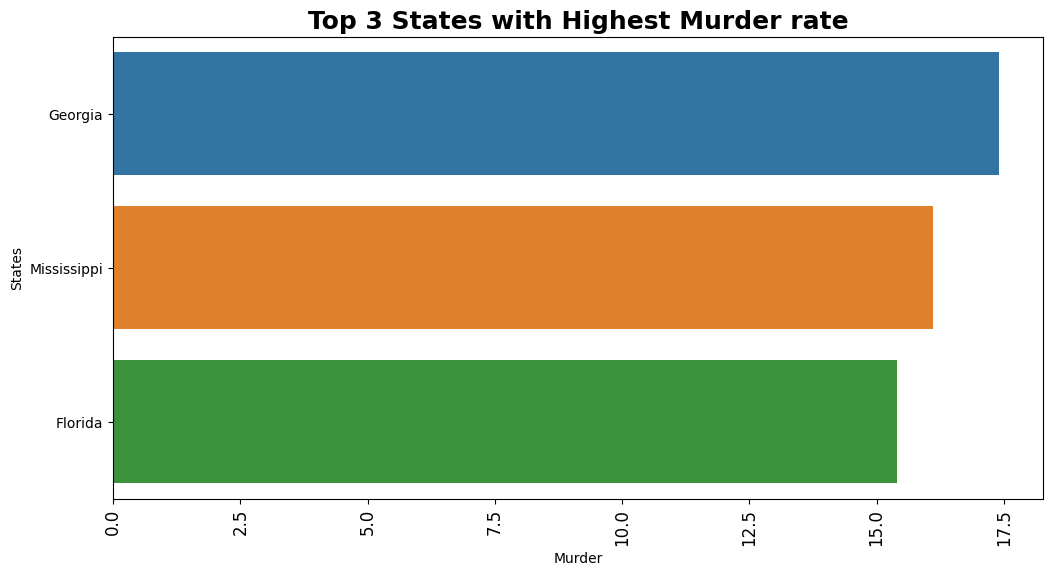

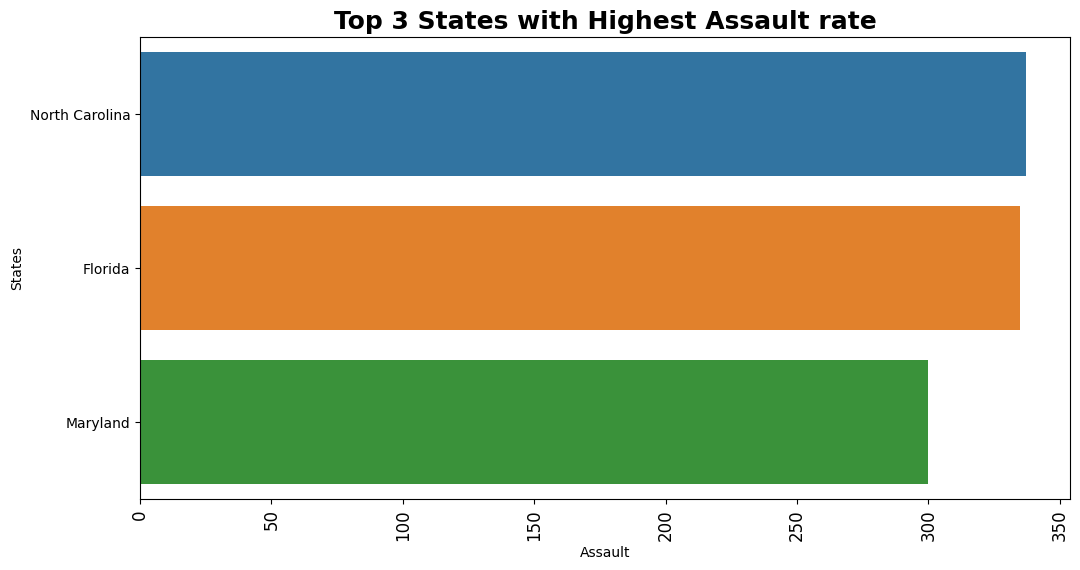

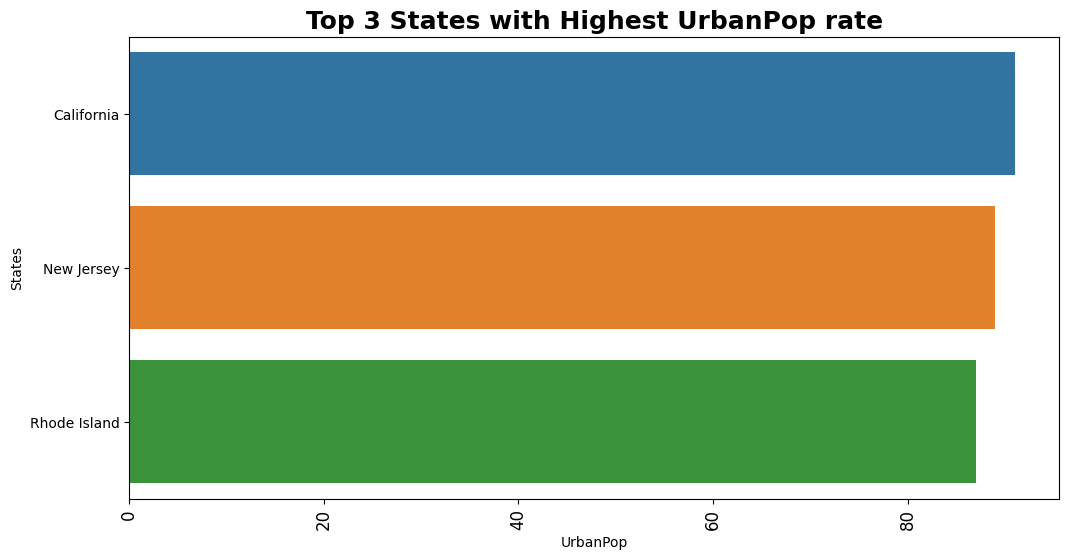

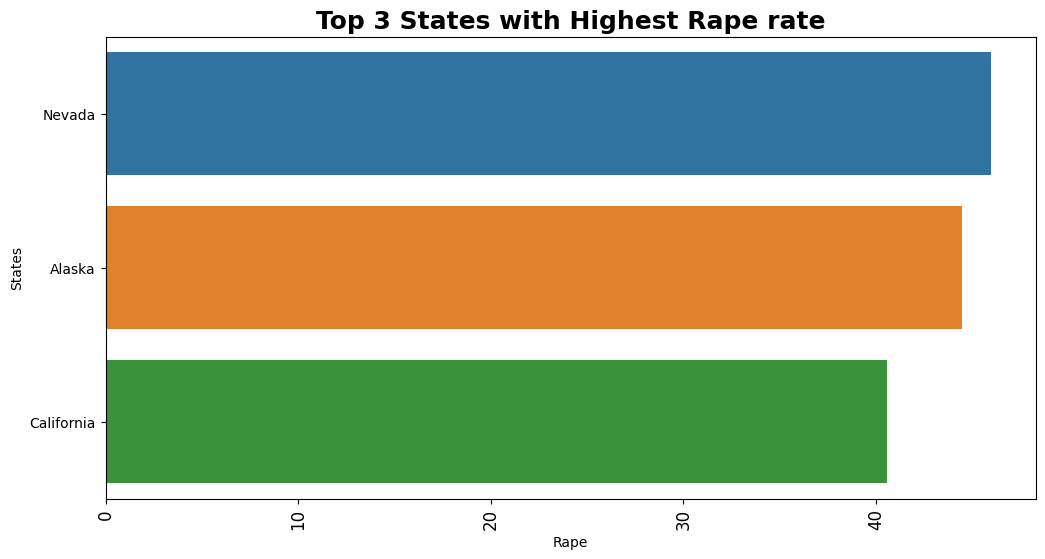

In [26]:
for i in Crime_Data.columns[1:]:
    plt.figure(figsize=(12,6))
    sns.barplot(x=i,y=Crime_Data["States"], data=Crime_Data,
              order=Crime_Data.sort_values(i,ascending=False).States[:3])
    plt.xticks(rotation = 90,fontsize = 12)
    plt.title("Top 3 States with Highest "+str(i)+" rate", fontsize=18, fontweight='bold')
plt.show()

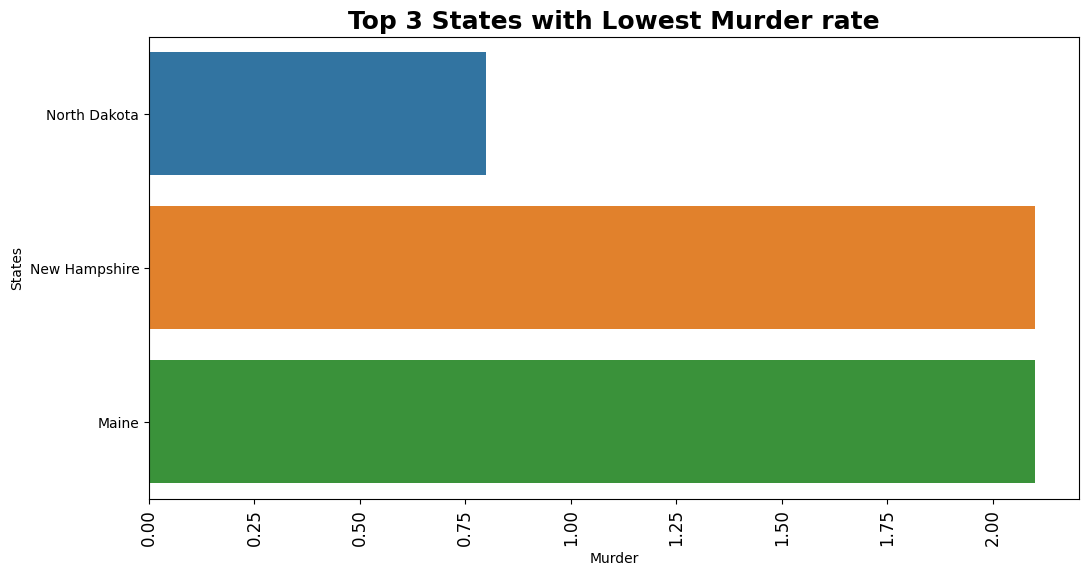

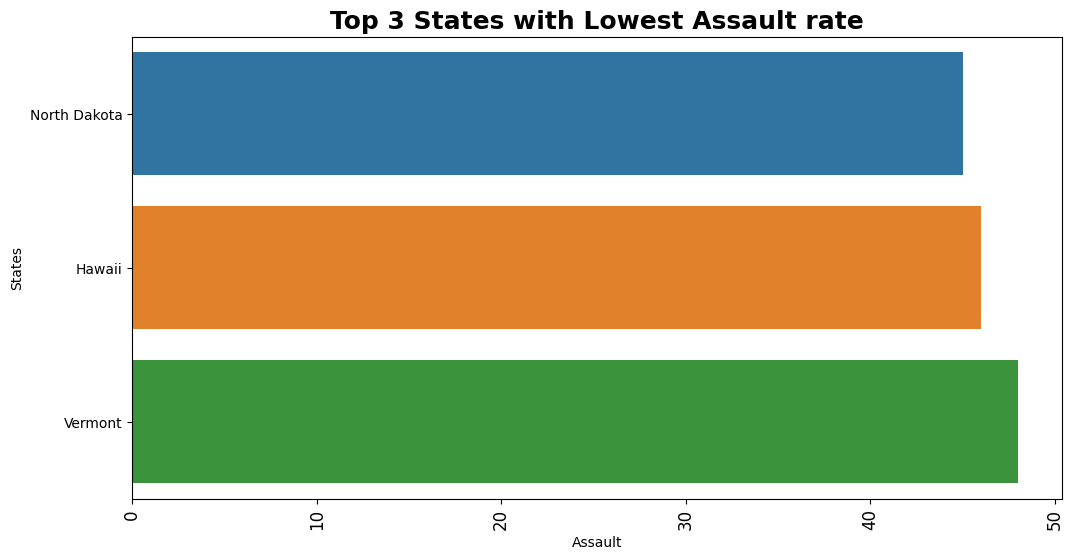

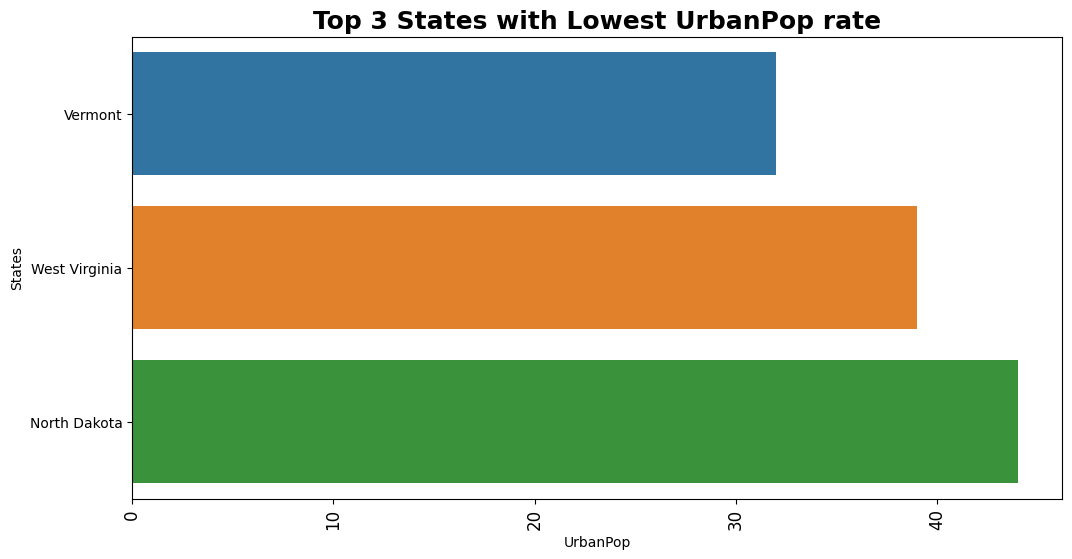

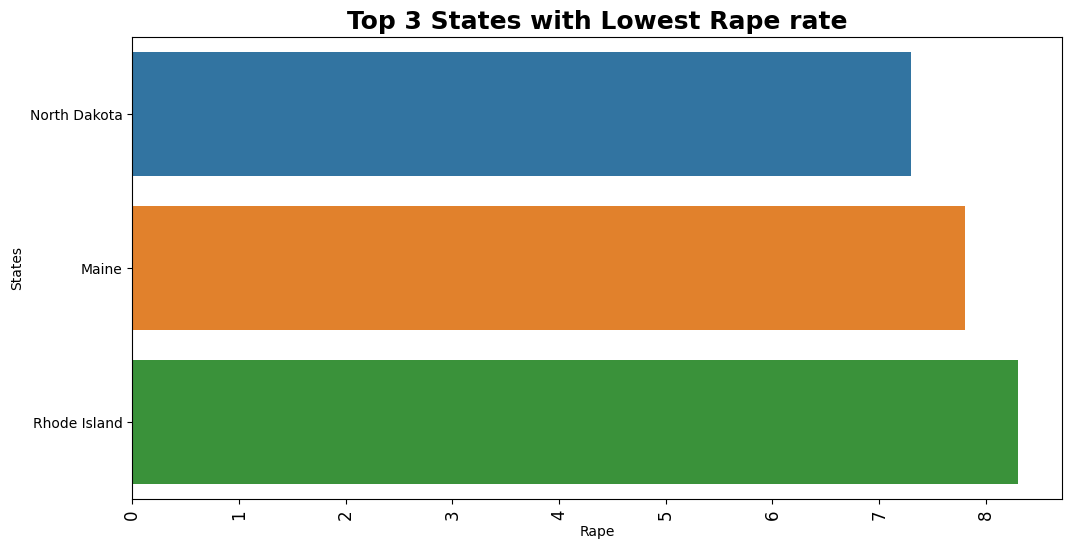

In [27]:
for i in Crime_Data.columns[1:]:
    plt.figure(figsize=(12,6))
    sns.barplot(x=i,y=Crime_Data["States"], data=Crime_Data,
              order=Crime_Data.sort_values(i,ascending=True).States[:3])
    plt.xticks(rotation = 90,fontsize = 12)
    plt.title("Top 3 States with Lowest "+str(i)+" rate", fontsize=18, fontweight='bold')
plt.show()

In [28]:
# Standardising the Data

Crime_Data_New = Crime_Data.drop(['States'], axis=1)
Crime_Data_New.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [29]:
standard_scaler = StandardScaler()
crime_data_std = standard_scaler.fit_transform(Crime_Data_New)
crime_data_std.shape

(50, 4)

In [30]:
# Normalising the Data

min_max = MinMaxScaler()
crime_data_norm = min_max.fit_transform(Crime_Data_New)
crime_data_norm.shape

(50, 4)

In [31]:
crime_data_norm

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

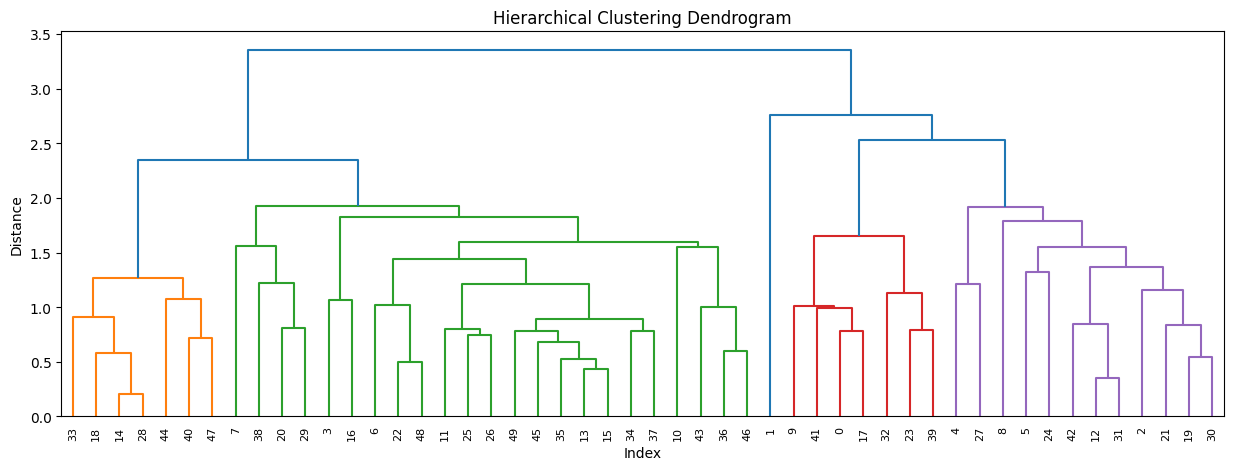

In [32]:
# Creating Linkage to determine number of clusters

z = linkage(crime_data_std, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [33]:
# Here we can see that there are 5 no of clusters.

In [36]:
# Building the Clustering Model

for nc in range(2,6):
    h_cluster = AgglomerativeClustering(n_clusters=nc, linkage='average',affinity = "euclidean").fit(crime_data_std)
    cluster_labels=pd.Series(h_cluster.labels_)
    slht_scr= sklearn.metrics.silhouette_score(crime_data_std, cluster_labels)
    print("For n_clusters =", nc,"The average silhouette_score is :", slht_scr)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.34863679190476177
For n_clusters = 4 The average silhouette_score is : 0.3636819420151221
For n_clusters = 5 The average silhouette_score is : 0.3212682619092323


In [38]:
h_cluster = AgglomerativeClustering(n_clusters=4, linkage='average',affinity = "euclidean").fit(crime_data_std)
cluster_labels=pd.Series(h_cluster.labels_)
cluster_labels
Crime_Data['clust']=cluster_labels
Crime_Data

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [39]:
# Group by Clusters

Crime_Data.iloc[:,1:].groupby(Crime_Data.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,4.870000,114.433333,63.633333,15.943333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0


In [40]:
# we can see that 4 no of clusters formed.

In [43]:
h_cluster_0 = Crime_Data[(Crime_Data.clust==0)]
h_cluster_0

,States,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0


In [44]:
h_cluster_1 = Crime_Data[(Crime_Data.clust==1)]
h_cluster_1

,States,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [45]:
h_cluster_2 = Crime_Data[(Crime_Data.clust==2)]
h_cluster_2

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,2


In [46]:
h_cluster_3 = Crime_Data[(Crime_Data.clust==3)]
h_cluster_3

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


<Figure size 960x480 with 0 Axes>

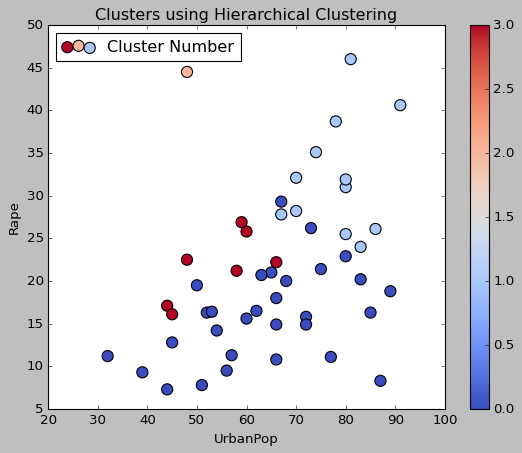

In [47]:
plt.style.use(['classic'])
plt.figure(figsize=(12,6))
Crime_Data.plot(x="UrbanPop",y ="Rape",c=cluster_labels,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using Hierarchical Clustering')
plt.show()

<Figure size 960x480 with 0 Axes>

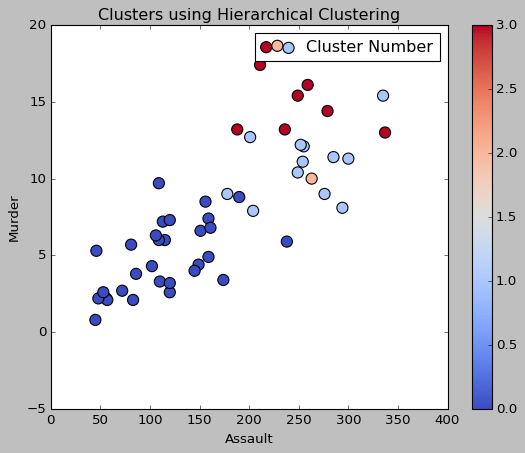

In [48]:
plt.style.use(['classic'])
plt.figure(figsize=(12,6))
Crime_Data.plot(x="Assault",y ="Murder",c=cluster_labels,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using Hierarchical Clustering')
plt.show()

We can see that some of the observations of one cluster are overlapping with the other cluster. So let us check the accuracy of the model in classifying data by evaluating Silhouette score.

In [49]:
# Evaluating accuracy of the model using Silhouette score

slht_scr_hc = sklearn.metrics.silhouette_score(crime_data_std, cluster_labels)
slht_scr_hc

0.3636819420151221

The Score is 0.3636 which is close to 0.
It indicates that the model is not that accurate at classifying the data.
0 score means the clusters are overlapping.

so we will try another method of clustering.

**K-Means Clustering Model**



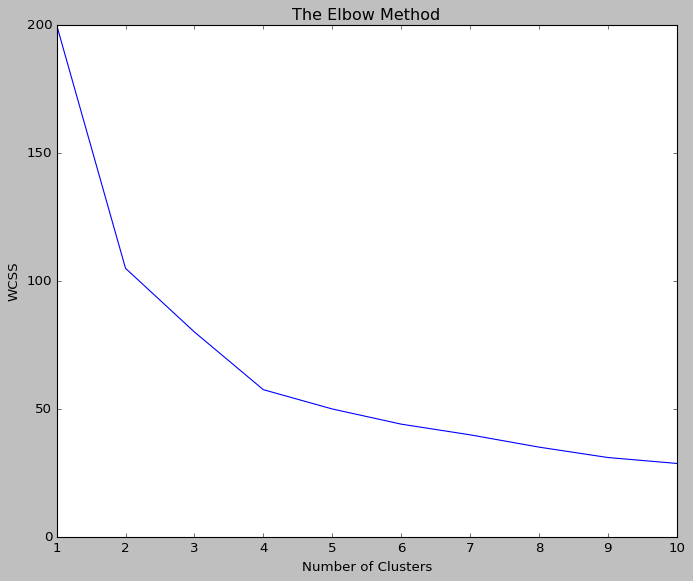

In [50]:
# Elbow Method

from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    k_cluster = KMeans(n_clusters=i)
    k_cluster.fit(crime_data_std)
    WCSS.append(k_cluster.inertia_)
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')

plt.show()

In [51]:
# Building the model with 4 clusters as Silhouette score gives us the model with 4 clusters

k_cluster = KMeans(n_clusters=4)
y_kmeans = k_cluster.fit_predict(crime_data_std)

In [52]:
y_kmeans

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 3, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [53]:
k_cluster.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 3, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [54]:
k_cluster.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [55]:
# Within cluster sum of squares or variance

k_cluster.inertia_

57.55425863091105

In [57]:
ks = pd.Series(y_kmeans)
Crime_Data['clust']=ks
Crime_Data

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,1


In [59]:
Crime_Data.iloc[:,1:].groupby(Crime_Data.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,5.656250,138.875000,73.875000,18.781250,0.0
1,13.937500,243.625000,53.750000,21.412500,1.0
2,3.600000,78.538462,52.076923,12.176923,2.0
3,10.815385,257.384615,76.000000,33.192308,3.0


Different States in each Cluster

In [62]:
k_cluster_0 = Crime_Data[(Crime_Data.clust==0)]
k_cluster_0

,States,Murder,Assault,UrbanPop,Rape,clust
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [63]:
k_cluster_1 = Crime_Data[(Crime_Data.clust==1)]
k_cluster_1

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
3,Arkansas,8.8,190,50,19.5,1
9,Georgia,17.4,211,60,25.8,1
17,Louisiana,15.4,249,66,22.2,1
23,Mississippi,16.1,259,44,17.1,1
32,North Carolina,13.0,337,45,16.1,1
39,South Carolina,14.4,279,48,22.5,1
41,Tennessee,13.2,188,59,26.9,1


In [64]:
k_cluster_2 = Crime_Data[(Crime_Data.clust==2)]
k_cluster_2

,States,Murder,Assault,UrbanPop,Rape,clust
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2


In [65]:
k_cluster_3 = Crime_Data[(Crime_Data.clust==3)]
k_cluster_3

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
8,Florida,15.4,335,80,31.9,3
12,Illinois,10.4,249,83,24.0,3
19,Maryland,11.3,300,67,27.8,3
21,Michigan,12.1,255,74,35.1,3
24,Missouri,9.0,178,70,28.2,3
27,Nevada,12.2,252,81,46.0,3


<Figure size 960x480 with 0 Axes>

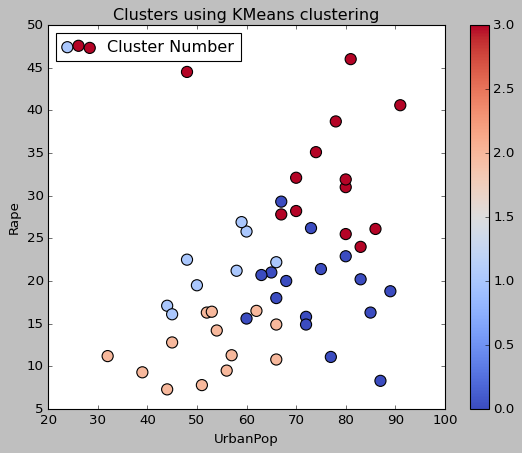

In [66]:
plt.style.use(['classic'])
plt.figure(figsize=(12,6))
Crime_Data.plot(x="UrbanPop",y ="Rape",c=k_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans clustering')
plt.show()

<Figure size 960x480 with 0 Axes>

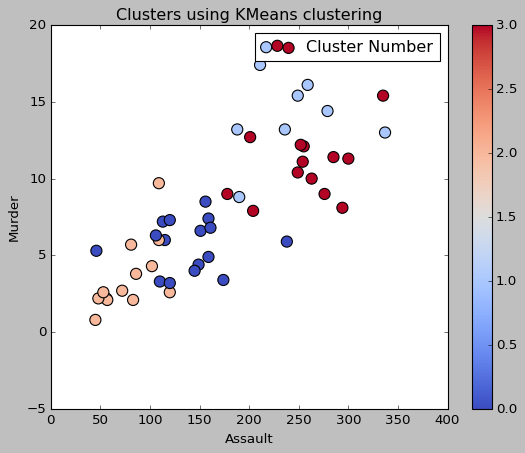

In [67]:
plt.style.use(['classic'])
plt.figure(figsize=(12,6))
Crime_Data.plot(x="Assault",y ="Murder",c=k_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans clustering')
plt.show()

In [68]:
slht_scr_kc = sklearn.metrics.silhouette_score(crime_data_std, k_cluster.labels_)
slht_scr_kc

0.33968891433344395

The score is closer to '0'. It indicates that the model is not that accurate at classifying the data, as clusters are overlapping. So try other methods of clustering.

DBSCAN

In [69]:
# Epsilon Value

nn = NearestNeighbors(n_neighbors=8)
nn = nn.fit(crime_data_std)
distances, indices = nn.kneighbors(crime_data_std)

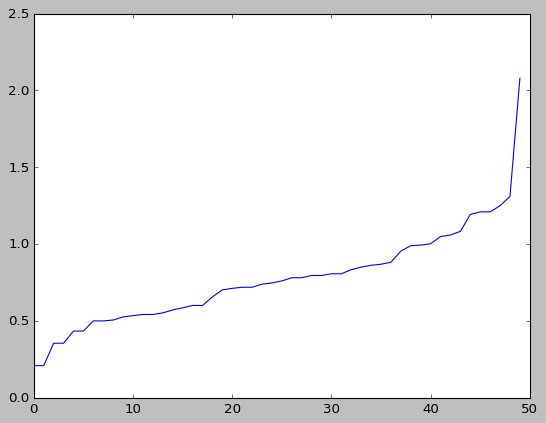

In [70]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

The curve took a sharp bend at a value of 1.25. Hence the epsilon value is 1.25.

In [71]:
# Building DBSCAN Model

d_cluster = DBSCAN(eps=1.25, min_samples=5)
d_cluster.fit(crime_data_std)

DBSCAN(eps=1.25)

In [72]:
d_cluster.labels_

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2])

In [74]:
ds = pd.Series(d_cluster.labels_)
Crime_Data['clust']=ds
Crime_Data

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [77]:
Crime_Data.iloc[:,1:].groupby(Crime_Data.clust).mean()


,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
-1,12.616667,287.000,64.833333,32.700000,-1.0
0,14.720000,232.600,58.200000,23.720000,0.0
1,10.328571,263.000,76.857143,30.685714,1.0
2,5.243750,119.125,64.343750,16.625000,2.0


Different States of each cluster

In [79]:
d_cluster_neg1 = Crime_Data[(Crime_Data.clust==-1)]
d_cluster_neg1

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,-1
4,California,9.0,276,91,40.6,-1
8,Florida,15.4,335,80,31.9,-1
23,Mississippi,16.1,259,44,17.1,-1
27,Nevada,12.2,252,81,46.0,-1
32,North Carolina,13.0,337,45,16.1,-1


In [80]:
d_cluster_0 = Crime_Data[(Crime_Data.clust==0)]
d_cluster_0

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [81]:
d_cluster_1 = Crime_Data[(Crime_Data.clust==1)]
d_cluster_1

,States,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
5,Colorado,7.9,204,78,38.7,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
30,New Mexico,11.4,285,70,32.1,1
31,New York,11.1,254,86,26.1,1


In [82]:
d_cluster_2 = Crime_Data[(Crime_Data.clust==2)]
d_cluster_2

,States,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,2
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
10,Hawaii,5.3,46,83,20.2,2
11,Idaho,2.6,120,54,14.2,2
13,Indiana,7.2,113,65,21.0,2
14,Iowa,2.2,56,57,11.3,2
15,Kansas,6.0,115,66,18.0,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2


<Figure size 960x480 with 0 Axes>

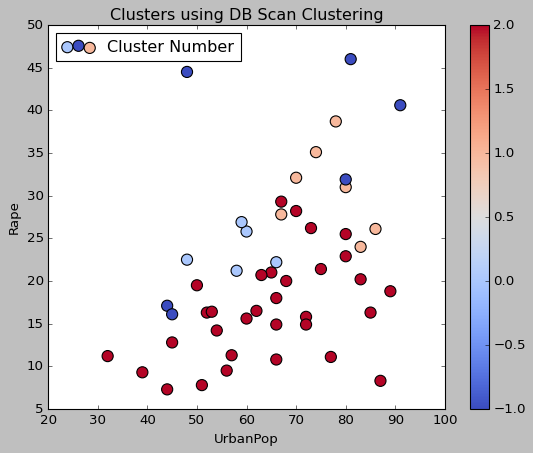

In [83]:
plt.style.use(['classic'])
plt.figure(figsize=(12,6))
Crime_Data.plot(x="UrbanPop",y ="Rape",c=d_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using DB Scan Clustering')
plt.show()

<Figure size 960x480 with 0 Axes>

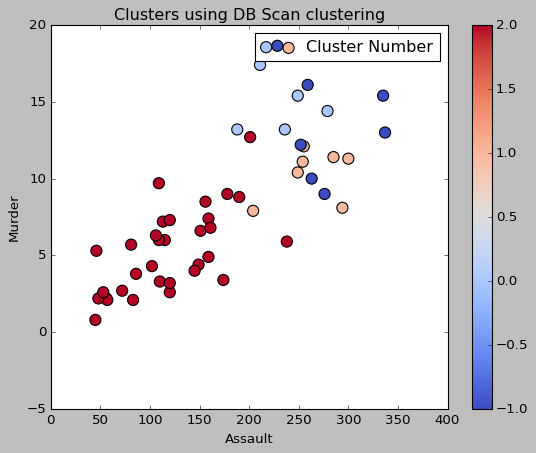

In [84]:
plt.style.use(['classic'])
plt.figure(figsize=(12,6))
Crime_Data.plot(x="Assault",y ="Murder",c=d_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using DB Scan clustering')
plt.show()

In [85]:
# here in this model also we can see the overlapping with the other cluster

In [86]:
# Evaluating accuracy of the model using Silhouette score

slht_scr_dc = sklearn.metrics.silhouette_score(crime_data_std, d_cluster.labels_)
slht_scr_dc

0.23869670053300915

In [87]:
# The Silhouette score considering 4 number of clusters is closer to '0'. Hence DB Scan clustering model is not able to classify the dataset accurately. However it detected outliers.

* Comparing all the models

In [88]:
print("The Silhouette score of Hierarchical Clustering:",slht_scr_hc)
print("The Silhouette score of KMeans Clustering:",slht_scr_kc)
print("The Silhouette score of DB Scan Clustering:",slht_scr_dc)

The Silhouette score of Hierarchical Clustering: 0.3636819420151221
The Silhouette score of KMeans Clustering: 0.33968891433344395
The Silhouette score of DB Scan Clustering: 0.23869670053300915


here we can see that the Silhouette Score for Hierarchical clustering is more than other two models.

Hence the Hierarchical clustering model can be selected to classify the dataset.